# Feature Extraction using VGG

One way to extract features is by using CNNs. For this purpose we will use VGG16.

The CNN should be used as fixed feature extractor on a new task. 

## Libraries

In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image as image_vgg
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf
from keras.layers import *
import keras

from IPython.display import clear_output

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import cv2
import os

import itertools

In [5]:
from dataset import Dataset

## Setup

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = '/content/drive/MyDrive'
base_dir = root_dir + '/Painting/'

Mounted at /content/drive


In [7]:
base_dir = base_dir + 'dataset/'
train_folder = base_dir + 'Train/train_2/'
test_folder = base_dir + 'Test/test/'

## Dataset

The dataset is taken by Kaggle at the following link: https://www.kaggle.com/c/painter-by-numbers/data .

We have to resize all the image to be (224,224) to be readable from VGG.

In [35]:
input_size = (224, 224)
dataset_train = Dataset(train_folder, input_size)
dim_dataset_train = dataset_train.length()
print('Training dimension is: ' + str(dim_dataset_train) )

Training dimension is: 8476


In [36]:
print(dataset_train._image_list[:10])
print(dataset_train._image_size[:10])

['/content/drive/MyDrive/Painting/dataset/Train/train_2/26025.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26310.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26332.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26457.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26458.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26465.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26466.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26470.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26475.jpg', '/content/drive/MyDrive/Painting/dataset/Train/train_2/26478.jpg']
(224, 224)


Populating the interactive namespace from numpy and matplotlib


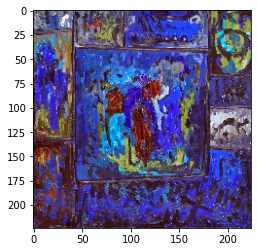

(224, 224, 3)


In [37]:
%pylab inline
img = dataset_train.get_image_by_filename( dataset_train._image_list[2] )
imgplot = plt.imshow(img)
plt.show()

print(img.shape)

## Models

In [12]:
#This give us all the model but the last layer
from tensorflow.keras.models import Model
base_model = VGG16(weights='imagenet')
base_model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

If we apply multiple cut we have multiple features. \
We have to find where to cut to extract usefull information.

In [13]:
model_1 = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output) # block4_pool

In [14]:
model_2 = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

In [85]:
model_3 = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

### Model 1

In [86]:
mode_name = 'model_1/'

for i in range(dim_dataset_train):
  im = dataset_train.get_image_by_index_vgg(i)

  clear_output(wait=True)
  print("{} / {} " .format(i+1, dim_dataset_train))
  #print( im.shape )

  im = model_1.predict(im)
  im = im.reshape(im.shape[1:])
  #print( im.shape )
  
  file_name = dataset_train._image_list[i][dataset_train._image_list[i].rfind('/')+1:]
  file_name = base_dir + 'features/' + mode_name +  file_name
  np.save(file_name, im)

8476 / 8476 


### Model 2

In [87]:
mode_name = 'model_2/'

for i in range(dim_dataset_train):
  im = dataset_train.get_image_by_index_vgg(i)

  clear_output(wait=True)
  print("{} / {} " .format(i+1, dim_dataset_train))
  #print( im.shape )

  im = model_2.predict(im)
  im = im.reshape(im.shape[1:])
  #print( im.shape )
  
  file_name = dataset_train._image_list[i][dataset_train._image_list[i].rfind('/')+1:]
  file_name = base_dir + 'features/' + mode_name +  file_name
  np.save(file_name, im)

8476 / 8476 


### Model 3

In [88]:
mode_name = 'model_3/'

for i in range(dim_dataset_train):
  im = dataset_train.get_image_by_index_vgg(i)

  clear_output(wait=True)
  print("{} / {} " .format(i+1, dim_dataset_train))
  #print( im.shape )

  im = model_3.predict(im)
  im = im.reshape(im.shape[1:])
  #print( im.shape )
  
  file_name = dataset_train._image_list[i][dataset_train._image_list[i].rfind('/')+1:]
  file_name = base_dir + 'features/' + mode_name +  file_name
  np.save(file_name, im)

8476 / 8476 
